In [59]:
import pandas as pd
import numpy as np
import random as rd
from statistics import mean
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import style
import math
dataset=pd.read_csv('Datasets/iris_3labels.csv')
dataset.describe()
X = dataset.iloc[:, [0, 1, 2, 3]].values
m  = X.shape[0]
n = X.shape[1]
Centroids=np.array([]).reshape(n,0)
n_iter = 150
K = 3
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2, axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]

C=np.argmin(EuclidianDistance,axis=1)+1

In [60]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(4,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T

for k in range(K):
    Centroids[:,k]=np.mean(Y[k+1],axis=0)


In [61]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2, axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(4,0)

      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y
print(Centroids)

[[5.88360656 5.006      6.85384615]
 [2.74098361 3.418      3.07692308]
 [4.38852459 1.464      5.71538462]
 [1.43442623 0.244      2.05384615]]


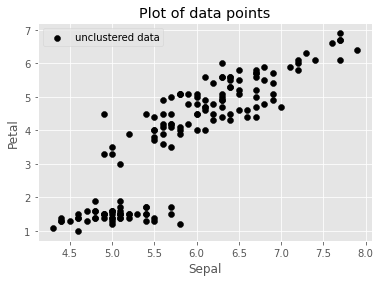

In [62]:
plt.scatter(X[:,0],X[:,2],c='black',label='unclustered data')
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.legend()
plt.title('Plot of data points')
plt.show()

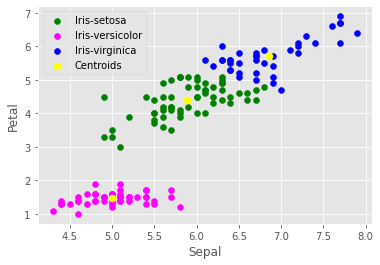

In [63]:
color=['green','magenta', 'blue']
labels=[  'Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,2],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[2,:],s=50,c='yellow',label='Centroids')
plt.xlabel('Sepal')
plt.ylabel('Petal')
plt.legend()
plt.show()

In [64]:
def dist(arr1, arr2):
    temp_dist = 0
    for i in range(len(arr1)):
        #print(i)
        temp_dist = temp_dist + ((float(arr1[i])-float(arr2[i]))**2)
    temp_dist = temp_dist**(0.5)
    return temp_dist
def getAccuracy(centres, records, no_of_records):
    true_positive1 = 0
    true_positive2 = 1

    true_negative1 = 0
    true_negative2 = 1

    false_positive1 = 0
    false_positive2 = 1

    false_negative1 = 0
    false_negative2 = 1

    accuracy1 = 0
    precision1 = 0
    recall1 = 0

    accuracy2 = 1
    precision2 = 1
    recall2 = 1

    for i in range(no_of_records):
        result = 1
        if(C[i]==3):
            if(dist(centres[2], records[i])<=dist(centres[0], records[i]) and dist(centres[2], records[i])<=dist(centres[1], records[i]) ):
                true_positive1 = 1
                true_negative1 = 1
            else:
                true_positive1 = 0
                true_negative1 = 0
                false_positive1 = 1
                false_negative1 = 1
        elif(C[i]==2):
            if(dist(centres[1], records[i])<=dist(centres[0], records[i]) and dist(centres[1], records[i])<=dist(centres[0], records[i])):
                true_positive1 = 1
                true_negative1 = 1
            else:
                true_positive1 = 0
                true_negative1 = 0
                false_positive1 = 1
                false_negative1 = 1
        else :
            if(dist(centres[0], records[i])<=dist(centres[1], records[i]) and dist(centres[0], records[i])<=dist(centres[2], records[i])):
                true_positive1 = 1
                true_negative1 = 1
            else:
                true_positive1 = 0
                true_negative1 = 0
                false_positive1 = 1
                false_negative1 = 1
        
                

    accuracy1 = ((true_positive1+true_negative1)/(true_positive1+true_negative1+false_positive1+false_negative1))*100
    precision1 = true_positive1/(true_positive1+false_positive1)
    recall1 = true_positive1/(true_positive1+false_negative1)
    if(precision1==1 or recall1==1):
        f1 = (2*precision1*recall1)/(precision1+recall1)
    else:
        f1=0

    for i in range(no_of_records):
        result = 0
        if(C[i]==3):
            if(dist(centres[2], records[i])<=dist(centres[0], records[i]) and dist(centres[2], records[i])<=dist(centres[1], records[i]) ):
                true_positive2 = 0
                true_negative2 = 0
            else:
                true_positive2 = 1
                true_negative2 = 1
                false_positive2 = 0
                false_negative2 = 0
        elif(C[i]==2):
            if(dist(centres[1], records[i])<=dist(centres[0], records[i]) and dist(centres[1], records[i])<=dist(centres[0], records[i])):
                true_positive2 = 0
                true_negative2 = 0
                
            else:
                true_positive2 = 1
                true_negative2 = 1
                false_positive2 = 0
                false_negative2 = 0
        else :
            if(dist(centres[0], records[i])<=dist(centres[1], records[i]) and dist(centres[0], records[i])<=dist(centres[2], records[i])):
                true_positive2 = 0
                true_negative2 = 0
            else:
                true_positive2 = 1
                true_negative2 = 1
                false_positive2 = 0
                false_negative2 = 0

    accuracy2 = ((true_positive2+true_negative2)/(true_positive2+true_negative2+false_positive2+false_negative2))*100
    precision2 = true_positive2/(true_positive2+false_positive2)
    recall2 = true_positive2/(true_positive2+false_negative2)
    if(precision2==1 or recall2==1):
        f2 = (2*precision2*recall2)/(precision2+recall2)
    else:
        f2=0

    return ([[accuracy1, precision1, recall1, f1],[accuracy2, precision2, recall2, f2]])
no_of_records = len(dataset)
getAccuracy(Centroids.T, X, no_of_records)

[[100.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0]]

In [65]:
style.use('ggplot')
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [66]:
predicted_dict={}
for cluster in range(3):
    for datapoints in Output[cluster+1]:
        data_str=str(datapoints)
        predicted_dict[data_str]=cluster+1

In [76]:
predicted= np.array([])
target = C
points = X


Confusion matrix, without normalization
[[61  0  0]
 [ 0 50  0]
 [ 0  0 39]]


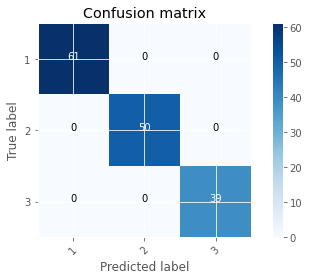

In [77]:
for i in range(len(points)):
    predicted = np.append(predicted, predicted_dict[str(points[i])])
class_names=[1, 2, 3]
ret_array=confusion_matrix(target, predicted, labels=class_names)
plot_confusion_matrix(ret_array, class_names,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)